In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Сделаем по 10 замеров для каждого P из {1, 2, 4, 8, 16} и 10 замеров быстрой сортировки с начальными параметрами n = 10000000 и m = 15000

In [30]:
stats1 = open('stats1.txt', 'r')

#Время работы программы без использования omp
T = [float(str(line)[:-2]) for line in stats1]
print(T)
t = np.mean(T)

stats1.close()

[2.53643, 2.53841, 2.53563, 2.53792, 2.532, 2.54102, 2.5456, 2.53465, 2.5305, 2.54054]


In [29]:
stats = open('stats.txt', 'r')

# Время работы программы на {1, 2, 4, 8, 16} потоках и время быстрой сортировки соответственно

T1, T2, T3, T4, T5, Q = [], [], [], [], [], []
lines = [float(str(line[:-2])) for line in stats]
for i in range(10):
    T1.append(lines[6 * i])
    T2.append(lines[6 * i + 1])
    T3.append(lines[6 * i + 2])
    T4.append(lines[6 * i + 3])
    T5.append(lines[6 * i + 4])
    Q.append(lines[6 * i + 5])

print(T1)
print(T2)
print(T3)
print(T4)
print(T5)
print(Q)

t1 = np.mean(T1)
t2 = np.mean(T2)
t3 = np.mean(T3)
t4 = np.mean(T4)
t5 = np.mean(T5)
q = np.mean(Q)

stats.close()

[2.60767, 2.64781, 2.63023, 2.55494, 2.53795, 2.63913, 2.608, 2.63238, 2.61692, 2.5796]
[1.45006, 1.72826, 1.42354, 1.3688, 1.40529, 1.44135, 1.48393, 1.40413, 1.38683, 1.3914]
[1.47802, 1.44583, 1.5433, 1.40328, 1.40031, 1.40639, 1.39993, 1.36602, 1.43736, 1.3957]
[1.47697, 1.4742, 1.47645, 1.79791, 1.39153, 1.40632, 3.78909, 1.44716, 1.38018, 4.60724]
[1.43192, 2.38746, 1.37449, 1.39032, 1.39241, 1.42726, 3.97291, 1.43505, 1.52013, 3.12384]
[2.21502, 6.17885, 2.27176, 2.18013, 2.21368, 2.21857, 2.25003, 2.23774, 2.19221, 2.27356]


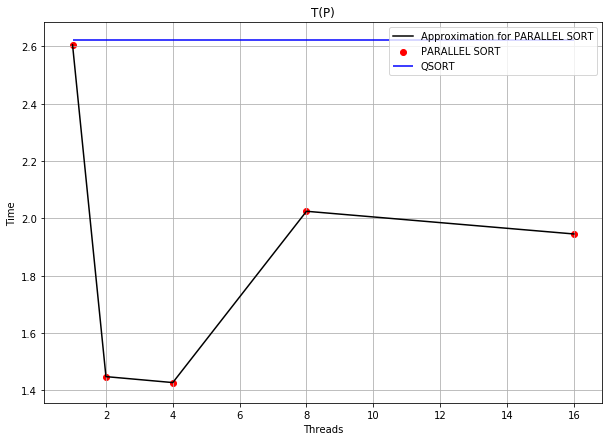

In [35]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t1, t2, t3, t4, t5])

plt.figure(figsize=(10,7))

plt.plot(x, y, "black", label='Approximation for PARALLEL SORT')
plt.scatter(x, y, c='red', label='PARALLEL SORT')
plt.hlines(q, 1, 16, color='blue', label='QSORT')

plt.xlabel("Threads")
plt.ylabel("Time")

plt.title("T(P)")
plt.grid()
plt.legend()
plt.show()

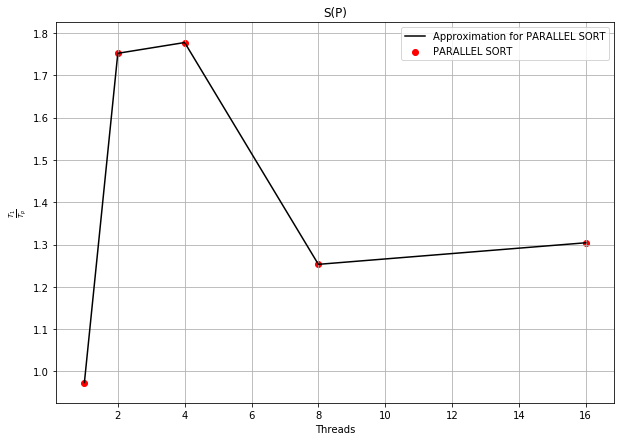

In [34]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t1, t2, t3, t4, t5])

plt.figure(figsize=(10,7))

plt.plot(x, t / y, "black", label='Approximation for PARALLEL SORT')
plt.scatter(x, t / y, c='red', label='PARALLEL SORT')

plt.xlabel("Threads")
plt.ylabel(r"$\frac{T_1}{T_p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()

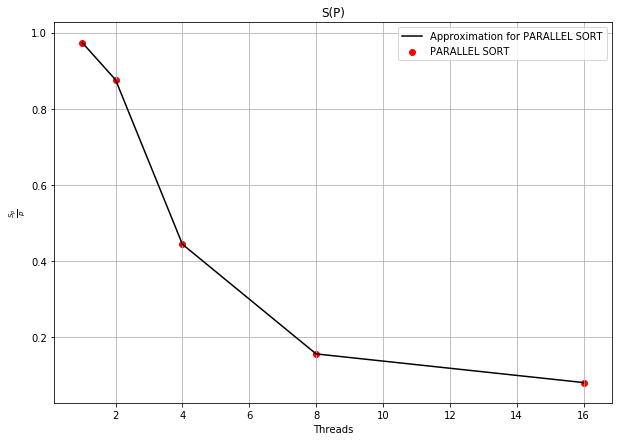

In [36]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t1, t2, t3, t4, t5])

plt.figure(figsize=(10,7))

plt.plot(x, t / (x * y), "black", label='Approximation for PARALLEL SORT')
plt.scatter(x, t / (x * y), c='red', label='PARALLEL SORT')

plt.xlabel("Threads")
plt.ylabel(r"$\frac{S_p}{p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()